# Import Packages

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from pandas import concat

# Directory setting

In [2]:
!git clone https://github.com/rhfo3218/LG_ML_tutorial.git
import os
os.chdir('/content/LG_ML_tutorial/9. Example_2_Quality_Management')

# Quality Management
![fig1](fig1.png)

In [3]:
# load data
product = pd.read_csv('data.csv')
dataset = np.array(product)

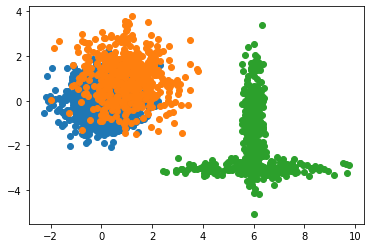

In [5]:
#2d plot
plt.scatter(dataset[dataset[:,10] == 1,0],dataset[dataset[:,10] == 1,1])
plt.scatter(dataset[dataset[:,10] == 2,0],dataset[dataset[:,10] == 2,1])
plt.scatter(dataset[dataset[:,10] == 3,0],dataset[dataset[:,10] == 3,1])
plt.show()


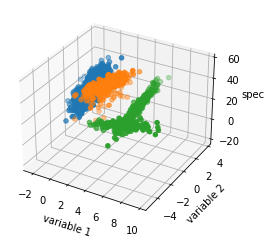

In [6]:
#3d plot


fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(dataset[dataset[:,10] == 1,0],dataset[dataset[:,10] == 1,1],dataset[dataset[:,10] == 1,11])
ax.scatter(dataset[dataset[:,10] == 2,0],dataset[dataset[:,10] == 2,1],dataset[dataset[:,10] == 2,11])
ax.scatter(dataset[dataset[:,10] == 3,0],dataset[dataset[:,10] == 3,1],dataset[dataset[:,10] == 3,11])

ax.set_xlabel('variable 1')
ax.set_ylabel('variable 2')
ax.set_zlabel('spec')

plt.show()

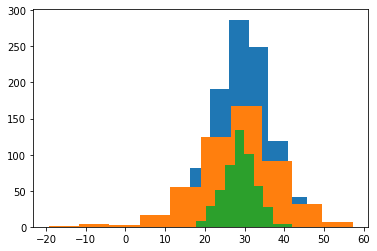

In [9]:
# spec 
# satisfies at 20 ~ 40
plt.hist(dataset[dataset[:,10] == 1,11])
plt.hist(dataset[dataset[:,10] == 2,11])
plt.hist(dataset[dataset[:,10] == 3,11])
plt.show()

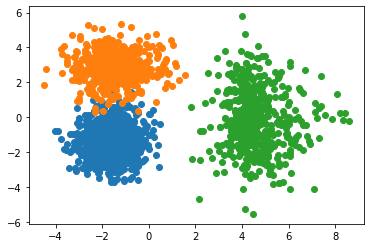

In [12]:
# pca-analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(dataset[:,0:10])
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

plt.scatter(principalDf.iloc[dataset[:,10] == 1,0],principalDf.iloc[dataset[:,10] == 1,1])
plt.scatter(principalDf.iloc[dataset[:,10] == 2,0],principalDf.iloc[dataset[:,10] == 2,1])
plt.scatter(principalDf.iloc[dataset[:,10] == 3,0],principalDf.iloc[dataset[:,10] == 3,1])
plt.show()

# Learning

In [29]:
# import packages for model fitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [15]:
# Normalize and train-test-split
# min-max normalize
scaler = MinMaxScaler()
scaler.fit(dataset)

maxs = scaler.data_max_
mins = scaler.data_min_

dataset = scaler.transform(dataset)
data_X = dataset[:,0:10]
data_y = dataset[:,11]

In [18]:
# train-test split
n_train = round(0.7*data_X.shape[0])
tr_X, ts_X, tr_Y, ts_Y = train_test_split(data_X, data_y, train_size=n_train)

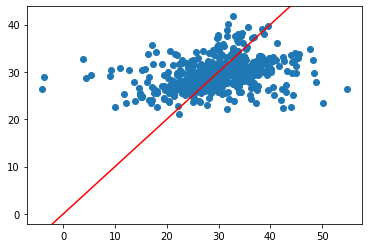

mae =  4.9
r2 =  0.104


In [31]:
# linear regression fitting 
linear_model = LinearRegression()
linear_model.fit(tr_X, tr_Y)
lr_pred = linear_model.predict(ts_X)

spec = ts_Y*(maxs[11]-mins[11]) + mins[11]
predicted_spec = lr_pred*(maxs[11]-mins[11]) + mins[11]
# true spec vs predicted spec
plt.scatter(spec,predicted_spec)

plt.plot(spec,spec,ls = "--", color ='r')
plt.show()

mae = np.mean(np.abs(spec-predicted_spec))
r2 = r2_score(spec,predicted_spec)

print("mae = ", np.round(mae, 3))
print("r2 = ", np.round(r2,3) )

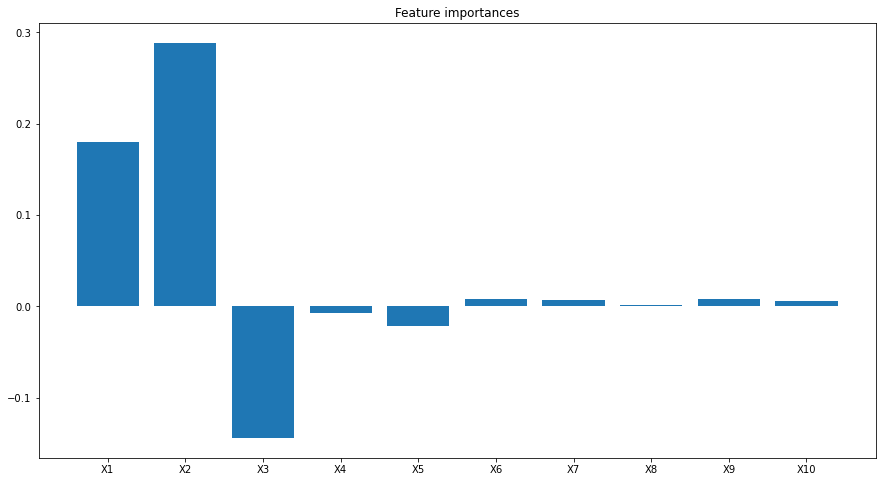

In [32]:
# feature importances 

# Coefficient( Feature importances )
plt.figure(figsize=(15,8))
plt.bar(['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'],linear_model.coef_)
plt.title('Feature importances')       
plt.show()

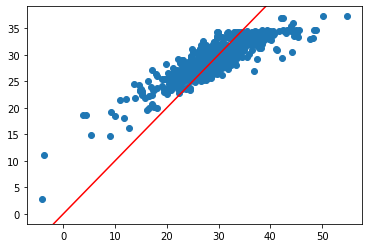

mae =  3.143
r2 =  0.655


In [33]:


# GradientBoosting fitting 
GBM_model = GradientBoostingRegressor( learning_rate=0.02, n_estimators=100, subsample=0.8)
GBM_model.fit(tr_X, tr_Y)
lr_pred = GBM_model.predict(ts_X)

spec = ts_Y*(maxs[11]-mins[11]) + mins[11]
predicted_spec = lr_pred*(maxs[11]-mins[11]) + mins[11]
# true spec vs predicted spec
plt.scatter(spec,predicted_spec)
plt.plot(spec,spec,ls = "--", color ='r')
plt.show()

mae = np.mean(np.abs(spec-predicted_spec))
r2 = r2_score(spec,predicted_spec)

print("mae = ", np.round(mae, 3))
print("r2 = ", np.round(r2,3) )
